Zajęcia z Praktycznego Machine Learningu w Pythonie. WNE UW. 2021
Student: Aleksander Ostruk

# Zbiór danych: cena wynajmu mieszkań w Warszawie
Możliwe użycie:
* Znajdź najlepsze mieszkanie dopasowane do budżetu
* Wyceń swoje mieszkanie na wynajem
* Oceń parametry mieszkania które najbardziej wpływają na jego cenę
* Znajdź średnie ceny dla grup mieszkań


In [6]:
# Zmienne pomocnicze, konfiguracja i parametry
results_folder = 'results/'

import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

## Eksploracja danych

In [7]:
import pandas as pd
import pandas_profiling
df = pd.read_csv("dane mieszkania/data_clean.csv")
print(df.shape)
df.head()

(3472, 85)


area  room_num  floor  total_floor   year_built  poddasze  \
0  37.0       2.0    1.0     4.000000  2001.453488       0.0   
1  38.0       2.0    1.0     5.802326  2020.000000       0.0   
2  57.0       3.0    1.0    15.000000  1984.000000       0.0   
3  63.0       2.0    4.0     5.000000  2005.000000       0.0   
4  65.0       3.0    3.0     4.000000  1938.000000       0.0   

   dish_washer(zmywarka)  fridge(lodówka)  furniture(meble)  oven(piekarnik)  \
0                    1.0              1.0               1.0              1.0   
1                    1.0              1.0               1.0              1.0   
2                    1.0              1.0               1.0              1.0   
3                    1.0              1.0               1.0              1.0   
4                    1.0              1.0               1.0              1.0   

   ...  district_ Warszawa  district_ Wawer  district_ Wesoła  \
0  ...                 0.0              0.0               0.0   
1  ...                 0.0              0.0               0.0   
2  ...                 0.0              0.0               0.0   
3  ...                 0.0              0.0               0.0   
4  ...                 0.0              0.0               0.0   

   district_ Wilanów  district_ Wola  district_ Włochy  district_ mazowieckie  \
0                0.0             0.0               1.0                    0.0   
1                0.0             0.0               0.0                    0.0   
2                0.0             0.0               0.0                    0.0   
3                0.0             0.0               0.0                    0.0   
4                0.0             0.0               0.0                    0.0   

   district_ Śródmieście  district_ Żoliborz  gross_price  
0                    0.0                 0.0  2435.244186  
1                    0.0                 0.0  2175.000000  
2                    0.0                 0.0  3300.000000  
3                    0.0                 0.0  2585.046512  
4                    0.0                 0.0  3424.918605  

[5 rows x 85 columns]

In [2]:
report = df.profile_report()
report.to_file(output_file=f"{results_folder}report_rent_price.html")

#### Podsumowanie raportu

##### Najbardziej problematyczne zmienne (usuwamy):
* constants: only_for_non_smokers, garage, closed_area, monitoring, intercom, secure_dorrs, 


##### 7 duplikatów (0.2%)

##### 0 pominiętych rekordów

##### brak wartości odstających
Jest kilka ofert odstających o np. dużej powierzchni ok 150m kw. lub piętrze >30, cenie > 1500. Lecz uznajemy takie wartości za przydatne a nie odstające


In [8]:
df.columns
columns = ['only_for_non-smokers(tylko_dla_niepalących)', 
           'garage/parking_space(garaż/miejsce_parkingowe)', 
           'closed_area(teren_zamknięty)', 
           'monitoring/security(monitoring/ochrona)', 
           'intercom/videophone(domofon/wideofon)', 
           'secure_doors/windows(drzwi/okna_antywłamaniowe)']
df.drop(columns, inplace=True, axis=1)

#Zmieńmy nazwy kolumn na tylko angielskie:
df.rename(columns={c:c.replace(' ', '').split('(', 1)[0] for c in df.columns}, inplace=True)

df.rename(columns={'build_type_Private_house_1+_fam':'szeregowiec', 
                   'build_type_Private_house_1_fam':'wolnostojacy', 
                   'build_type_Loft/attic':'loft',
                  'anti-burglaryblinds':'anti_burglaryblinds',
                  'two-level':'two_level',
                  'district_Praga-Południe':'district_Praga_Południe',
                  'district_Praga-Północ':'district_Praga_Północ'}, inplace=True)

df.drop_duplicates()
features = df.columns.tolist()
target = "gross_price"
numFeatures = ['area']

try:
    features.remove(target)
    numFeatures.remove(target)
except ValueError:
    pass  # do nothing!

catFeatures = [f for f in features if f not in numFeatures]

AxesSubplot(0.125,0.125;0.775x0.755)


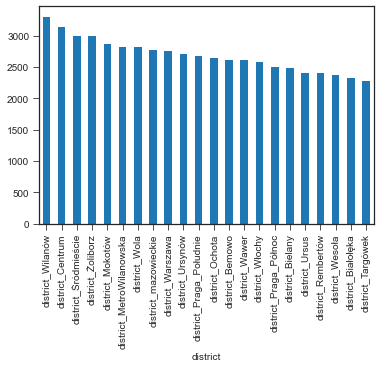

In [95]:
# Trochę jeszcze statystyk dla lepszego wlądu w dane
# JAKA ŚREDNIA CENA MIESZKANIA W DZIELNICY?
df["district"] = df[[f for f in features if f.startswith('district')]].idxmax(axis=1)
srednia_cena = df.groupby('district')['gross_price'].mean().sort_values(ascending=False)
print(srednia_cena.plot.bar(x='Średnia cena w dzielnicy'))

In [102]:
# Zbiór nie jest zrównoważony
# Możemy rozważyć wylączenie kategorii niereprezentatywnych, lub odniesienie ich (polączenie) w bardziej ogólne
print(df.groupby('district')['gross_price'].count().sort_values(ascending=False))

district
district_Mokotów            647
district_Wola               512
district_Śródmieście        342
district_Praga_Południe     239
district_Ursynów            205
district_Ochota             201
district_Bielany            166
district_Bemowo             155
district_Białołęka          155
district_Praga_Północ       135
district_Wilanów            125
district_Targówek           116
district_Żoliborz           105
district_Ursus               97
district_Włochy              77
district_Centrum             60
district_mazowieckie         44
district_Wawer               42
district_Warszawa            19
district_Wesoła              14
district_Rembertów           14
district_MetroWilanowska      2
Name: gross_price, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


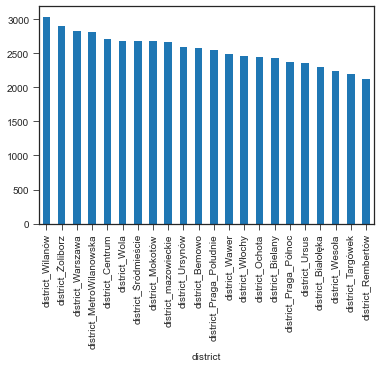

In [96]:
print(df.groupby('district')['gross_price'].median().sort_values(ascending=False).plot.bar(x='Mediana ceny w dzielnicy'))
# JAKA MEDIANA CENY MIESZKANIA W DZIELNICY?

AxesSubplot(0.125,0.125;0.775x0.755)


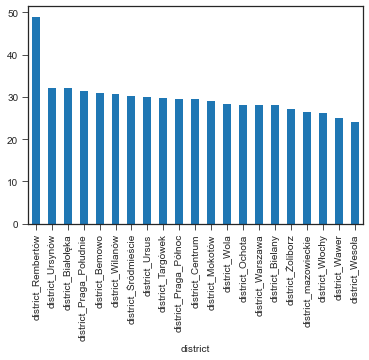

In [98]:
# JAKA ŚREDNIA WIELKOŚĆ KAWALERKI W DZIELNICY?
print(df[df['room_num']==1].groupby('district')['area'].mean().sort_values(ascending=False).plot.bar(x='nŚREDNIA dzielnica ile ma pokój'))

AxesSubplot(0.125,0.125;0.775x0.755)


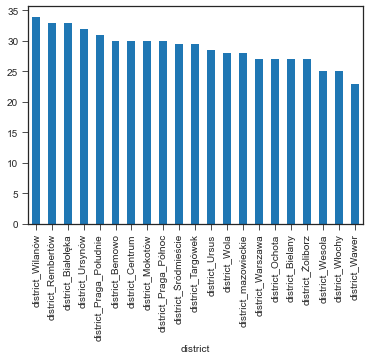

In [99]:
# JAKA MEDIANA WIELKOŚCI KAWALERKI W DZIELNICY?
print(df[df['room_num']==1].groupby('district')['area'].median().sort_values(ascending=False).plot.bar(x='nŚREDNIA dzielnica ile ma pokój'))

## Model regresji liniowej

Próbujemy oszacować cenę mieszkania w najprostszy możliwy sposób

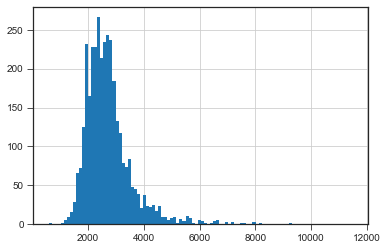

In [5]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
%matplotlib inline

from IPython.display import display

# Obejrzyjmy histogram zmiennej objaśnianej
df.gross_price.hist(bins=100)
plt.show()

In [7]:
import statsmodels.formula.api as smf
# Takie zmienne jak lodówka, poddasze czy meble mogą nie mieć sensu ponieważ zbiory są mocno znierównoważone
# dla tych zmiennych (większość ma lodówkę, nie ma poddasza, ma meble)
formula_full = 'gross_price ~ ' + ' + '.join(features)
mod = smf.ols(formula = formula_full, data = df)
res = mod.fit()
summary = res.summary()
with open(f"{results_folder}/regresja_rent_prices.txt", "w") as fp:
    fp.write(str(summary))
    print(summary)

                            OLS Regression Results                            
Dep. Variable:            gross_price   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     112.0
Date:                Tue, 08 Jun 2021   Prob (F-statistic):               0.00
Time:                        08:18:26   Log-Likelihood:                -26494.
No. Observations:                3472   AIC:                         5.314e+04
Df Residuals:                    3394   BIC:                         5.362e+04
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

### Komentarz
Widać, że wiele zmiennych takich jak floor, year_built, fridge, district_mazowieckie, furniture, oven, stove, balcony, basement może być nieistotnych

Wylączmy niektóre z nich, te które wydają się być rzeczywiście niereprezentatywne

Tworzymy inną grupę zmiennych objaśniających bez nich, będziemy testować oba warianty


## Ciekawe spostrzerzenia
* Cecha Renowation (do odnowienia) istotnie niegatywnie wpływa na wynik aż o -1074.4333 zł (czego można było oczekiwać)
* Natomiast inny przypadek - cecha Loft (styl mieszkania) istotnie pozytywnie wpływa aż o 1469.1314 zł.
* Owszem mieszkania zlokalizowane w śródmieściu (o tych samych pozostałych parametrach) są średnio droższe o 456.77 zł.
* A te zlokalizowane w Rembertowie są średnio tańsze o 538.14 zł przy pozostałych cechach niezmienionych
* availableforstudents obniża cenę (lub: oferty dla studentów są tańsze)
* alarmsystem obniża cenę (niebezpieczny rejon?)
* telefon, meble czy internet nie mają istotnego wpływu na końcową cenę

In [43]:
features_insignificant = ['fridge', 
                          'district_mazowieckie', 
                          'furniture', 
                          'oven', 
                          'stove', 
                          'heating_Electric', 
                          'telephone', 
                          'internet', 
                          'heating_Boiler',
                          'build_mat_Autoclaved_aerated_concrete', 
                          'build_mat_Concreate',
                          'build_mat_Brick']
features_significant = [f for f in features if f not in features_insignificant]

## Uniwersalne funkcje dla modeli skitlearn

Zdefiniujmy powtarzalny schemat dla łatwiejszego testowania modeli z różnymi parametrami

In [40]:
#importy
import json
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from pprint import pprint
import operator
from sklearn.preprocessing import StandardScaler


In [12]:
# funkcja budująca listę argumentów do przekazania (uwaga-kolejność ma znaczenie, ma być taka jak dla modelu)
def build_params_list(array_of_arrays):
    if len(array_of_arrays)==1:
        for param in array_of_arrays[0]:
            yield [param]
    else:
        for param in array_of_arrays[0]:
            for p in build_params_list(array_of_arrays[1:]):
                yield [param] + p

In [26]:
# funkcja budująca słownik argumentów do przekazania
def build_params_dict(dict_of_list):
    l = []
    for k in dict_of_list:
        l.append(dict_of_list[k])
    for elist in build_params_list(l):
        i = 0
        rd = {}
        for k in dict_of_list:
            rd[k]=elist[i]
            i+=1
        yield rd
            

In [46]:
# implementacja grid search - przekazujemy model, zakres parametrów do wytestowania oraz specyfikacje kfolda. 
# Funkcja przelatuje po wszystkich możliwych kombinacjach, zapisując wyniki do wskazanego pliku
def grid_search(array_of_arrays, 
                model_function, 
                kfold_repeats=3, 
                kfold_splits=5, 
                results_filename='randomForestModels',
               features_train=features,
               feature_predicted=target,
               dataset=df,
               with_scaling=False):
    models_configs = []
    all_params_sets = [ps for ps in build_params_list(array_of_arrays)]
    iteration = 0
    for params_list in all_params_sets:
        model = model_function(*params_list)
        models_config = {'params':model.get_params()}
        # evaluate the model
        scores_to_apply = ['neg_mean_absolute_error', 'max_error', 'r2', 'explained_variance']
        cv = RepeatedKFold(n_splits=kfold_splits, n_repeats=kfold_repeats, random_state=1)
        X = dataset[features_train].values
        y = dataset[feature_predicted].values
        if with_scaling:
            pass
            sc_X = StandardScaler()
            X = sc_X.fit_transform(X, y)
        
        scores = cross_validate(model, 
                                X, 
                                y, 
                                scoring=scores_to_apply, 
                                cv=cv, n_jobs=-1, error_score='raise')
        
        for s in scores_to_apply:
            models_config[f'{s}_mean'] = mean(scores[f'test_{s}'])
            models_config[f'{s}_std'] = std(scores[f'test_{s}'])

        print(f'Iteration {iteration} of {len(all_params_sets)} for {results_filename} with {len(features_train)} features: R2: {mean(scores["test_r2"])}')
        iteration += 1
        models_configs.append(models_config)
    #save model results to json
    with open(f"{results_folder}{results_filename}.json", 'w') as outfile:
        json.dump(models_configs, outfile)
        return models_configs

In [15]:
def print_best_params(models_configs):
    best = max(models_configs, key=lambda item: item['r2_mean'])
    print("\n+=====================+")
    print("Best model results:")
    pprint(best)
    print("+=====================+\n")

## Regresja liniowa skitlearn

In [44]:
# Liniowa bez regularyzacji
linear_models =  grid_search([[True, False], [True, False]], model_function=linear_model.LinearRegression, results_filename='linear')
print_best_params(linear_models)
linear_models_limited =  grid_search([[True, False], [True, False]], model_function=linear_model.LinearRegression, results_filename='linearSignificant', features_train=features_significant)
print_best_params(linear_models)

Iteration 0 of 4 for linear with 78 features: R2: -2.0993864414090746e+20
Iteration 1 of 4 for linear with 78 features: R2: 0.6867231817336277
Iteration 2 of 4 for linear with 78 features: R2: 0.6863775451085161
Iteration 3 of 4 for linear with 78 features: R2: 0.6863775451085161

+=====================+
Best model results:
{'explained_variance_mean': 0.6871706944437828,
 'explained_variance_std': 0.038859637491371106,
 'max_error_mean': -4340.98642354953,
 'max_error_std': 947.3372211622868,
 'neg_mean_absolute_error_mean': -351.8007689517851,
 'neg_mean_absolute_error_std': 11.28131758913343,
 'params': {'copy_X': True,
            'fit_intercept': True,
            'n_jobs': None,
            'normalize': False,
            'positive': False},
 'r2_mean': 0.6867231817336277,
 'r2_std': 0.038883775821880566}
+=====================+

Iteration 0 of 4 for linearSignificant with 66 features: R2: -2.20268085848209e+25
Iteration 1 of 4 for linearSignificant with 66 features: R2: 0.6888456

In [19]:
# Regresja liniowa z regularyzacją
linear_lasso_models =  grid_search([[0.5, 1.0, 2.0, 5.0], [True, False], [True, False]], model_function=linear_model.Lasso, results_filename='linearLasso')
print_best_params(linear_lasso_models)

linear_ridge_models =  grid_search([[0.5, 1.0, 2.0, 5.0, 10.0], [True, False], [True, False]], model_function=linear_model.Ridge, results_filename='linearRidge')
print_best_params(linear_ridge_models)

linear_elastic_net_models =  grid_search([[0.5, 1.0, 2.0, 5.0, 10.0], [0.2, 0.5, 0.9], [True, False], [True, False]], model_function=linear_model.ElasticNet, results_filename='linearElasticNet')
print_best_params(linear_elastic_net_models)


Iteration 0 of 16: R2 is 0.6800088534537618
Iteration 1 of 16: R2 is 0.6904909107383423
Iteration 2 of 16: R2 is 0.6806680853405059
Iteration 3 of 16: R2 is 0.6806680853405059
Iteration 4 of 16: R2 is 0.6555181871268265
Iteration 5 of 16: R2 is 0.6923133364313477
Iteration 6 of 16: R2 is 0.6802989450699258
Iteration 7 of 16: R2 is 0.6802989450699258
Iteration 8 of 16: R2 is 0.6066603823625587
Iteration 9 of 16: R2 is 0.6915057608613606
Iteration 10 of 16: R2 is 0.6790564210271255
Iteration 11 of 16: R2 is 0.6790564210271255
Iteration 12 of 16: R2 is 0.504895827350338
Iteration 13 of 16: R2 is 0.6834550642003802
Iteration 14 of 16: R2 is 0.6704872803593833
Iteration 15 of 16: R2 is 0.6704872803593833
Best model results:
{'neg_abs_error_mean': -346.1872121674694,
 'neg_abs_error_std': 11.777086435628755,
 'params': {'alpha': 1.0,
            'copy_X': True,
            'fit_intercept': True,
            'max_iter': 1000,
            'normalize': False,
            'positive': False,
    

In [150]:
# Widać, że regularyzacja poprawiła regresję w przypadku Lasso (alpha=1.0) oraz Ridge (alpha=10)
# Najlepszy wynik to 0.6936709358034665 (Ridge)
from sklearn.feature_selection import SelectFromModel
sel_ = SelectFromModel(linear_model.Ridge(alpha=10, solver='auto'))
sel_.fit(df[features].values, df[target].values)

selected_feat = pd.Series(features)[(sel_.get_support())]
print('total features: {}'.format(len(features)))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

selected_feat

total features: 78
selected features: 30
features with coefficients shrank to zero: 0


1                          room_num
5                          poddasze
6                       dish_washer
12                           washer
18                  separatekitchen
22                  airconditioning
26                        two_level
28      build_type_Apartment_high_q
29    build_type_Apartment_medium_q
31                             loft
33                     wolnostojacy
34              build_type_Tenement
51                      heating_Gas
52                    heating_Other
53             status_Not_ready_yet
55                status_Renovation
56                  district_Bemowo
57               district_Białołęka
59                 district_Centrum
61                 district_Mokotów
62                  district_Ochota
65               district_Rembertów
66                district_Targówek
67                   district_Ursus
70                   district_Wawer
71                  district_Wesoła
72                 district_Wilanów
73                    distri

## Regresja z użyciem random forest

In [63]:
# Number of trees in random forest
n_estimators = [2000]
criterion = ['mse']
max_depth = [110]
min_samples_split = [2]
min_samples_leaf = [1, 2]
min_weight_fraction_leaf = [0.0]
max_features = ['auto', 'sqrt']

grid_array = [n_estimators, criterion, max_depth, min_samples_split, min_samples_leaf] 
forest_models = grid_search(grid_array, model_function=RandomForestRegressor, results_filename='randomForestModels')
print_best_params(forest_models)

Iteration 0 of 1: R2 is 0.7334646572155238
Best model params:
{'neg_abs_error_mean': -351.8007689517848,
 'neg_abs_error_std': 11.28131758913344,
 'params': {'copy_X': True,
            'fit_intercept': True,
            'n_jobs': None,
            'normalize': False},
 'r2_mean': 0.6867231817336287,
 'r2_std': 0.03888377582188019}


In [94]:
# Troche szersze = dłuższe szukanie. Zbyt długie, dlatego zakomentowane po pierwszym przepuszczeniu (wyniki można zobaczyć w plikach)
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 2)]
criterion = ['mse', 'mae']
max_depth = [int(x) for x in np.linspace(10, 110, num = 2)]
min_samples_split = [2, 4]
min_samples_leaf = [1, 4]
max_features = ['auto', 'sqrt']

grid_array = [n_estimators, criterion, max_depth, min_samples_split, min_samples_leaf]
#forest_models_full = grid_search(grid_array, model_function=RandomForestRegressor, results_filename='randomForestModelsFull')
#print_best_params(forest_models_full)

## Najlepszy uzyskany wynik randomForest to r2=0.734
```JSON
{'explained_variance_mean': 0.7347850818710733,
 'explained_variance_std': 0.027139857135637303,
 'max_error_mean': -4217.169483526852,
 'max_error_std': 824.6787813576259,
 'neg_mean_absolute_error_mean': -307.8198331716334,
 'neg_mean_absolute_error_std': 11.155750913855604,
 'params': {'bootstrap': True,
            'ccp_alpha': 0.0,
            'criterion': 'mse',
            'max_depth': 110,
            'max_features': 'auto',
            'max_leaf_nodes': None,
            'max_samples': None,
            'min_impurity_decrease': 0.0,
            'min_impurity_split': None,
            'min_samples_leaf': 1,
            'min_samples_split': 4,
            'min_weight_fraction_leaf': 0.0,
            'n_estimators': 200,
            'n_jobs': None,
            'oob_score': False,
            'random_state': None,
            'verbose': 0,
            'warm_start': False},
 'r2_mean': 0.7342754529055047,
 'r2_std': 0.027320410558782798}
```

In [68]:
def plot_top_n_features(features, feature_importances, topN):
    sorted_idx = feature_importances.argsort()
    forest_importances = pd.Series(feature_importances[sorted_idx], index=np.asarray(features)[sorted_idx])
    fig, ax = plt.subplots()
    forest_importances[len(forest_importances)-topN:len(forest_importances)].plot.bar(ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()

[2000, 'mae', 110, 2, 1]
Best parameters for the model: 
{'bootstrap': True,
 'criterion': 'mae',
 'max_depth': 110,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 2000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
MAE: -313.586 (9.097)
R2: 0.722


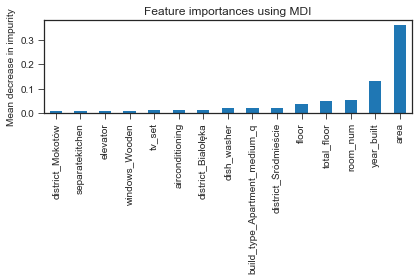

In [151]:
#Model 29 z R2 0.7338528941924545 wydaje się być najlepszy. Narysujmy jego wynik

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 2)]
criterion = ['mse', 'mae']
max_depth = [int(x) for x in np.linspace(10, 110, num = 2)]
min_samples_split = [2, 4]
min_samples_leaf = [1, 4]
max_features = ['auto', 'sqrt']

grid_array = [n_estimators, criterion, max_depth, min_samples_split, min_samples_leaf]

all_params_sets = [ps for ps in build_params_list(grid_array)][28]
print(all_params_sets)
model = RandomForestRegressor(*all_params_sets)
models_config = {'params':model.get_params()}
cv = RepeatedKFold(n_splits=3, n_repeats=2, random_state=1)
n_scores = cross_val_score(model, df[features].values, df[target].values, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
r2 = cross_val_score(model, df[features].values, df[target].values, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')

print('Best parameters for the model: ')
pprint(model.get_params())
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('R2: %.3f' % mean(r2))

model.fit(df[features].values, df[target].values)
plot_top_n_features(features, model.feature_importances_, 15)

In [66]:
from sklearn.tree import export_text

print(export_text(model.estimators_[0], 
                  spacing=3, decimals=3,
                  feature_names=features))

|--- area <= 44.500
|   |--- room_num <= 1.500
|   |   |--- area <= 27.500
|   |   |   |--- area <= 18.500
|   |   |   |   |--- area <= 7.500
|   |   |   |   |   |--- value: [588.047]
|   |   |   |   |--- area >  7.500
|   |   |   |   |   |--- cableTV <= 0.500
|   |   |   |   |   |   |--- district_Włochy <= 0.500
|   |   |   |   |   |   |   |--- internet <= 0.500
|   |   |   |   |   |   |   |   |--- total_floor <= 9.000
|   |   |   |   |   |   |   |   |   |--- availableforstudents <= 0.500
|   |   |   |   |   |   |   |   |   |   |--- dish_washer <= 0.500
|   |   |   |   |   |   |   |   |   |   |   |--- value: [1537.465]
|   |   |   |   |   |   |   |   |   |   |--- dish_washer >  0.500
|   |   |   |   |   |   |   |   |   |   |   |--- value: [1600.000]
|   |   |   |   |   |   |   |   |   |--- availableforstudents >  0.500
|   |   |   |   |   |   |   |   |   |   |--- district_Wawer <= 0.500
|   |   |   |   |   |   |   |   |   |   |   |--- value: [1485.000]
|   |   |   |   |   |   |   |   

In [89]:
small_tree_model = RandomForestRegressor(20, 'mae', 5, 2, 1)
small_tree_model.fit(df[features].values, df[target].values)
from dtreeviz.trees import dtreeviz
viz = dtreeviz(small_tree_model.estimators_[0], df[features].values, df[target].values,
               feature_names=features,
               title="1st decision tree - House price")

viz.save("decision_tree_house.svg")

In [93]:
from IPython.core.display import SVG
SVG(filename='decision_tree_house.svg')

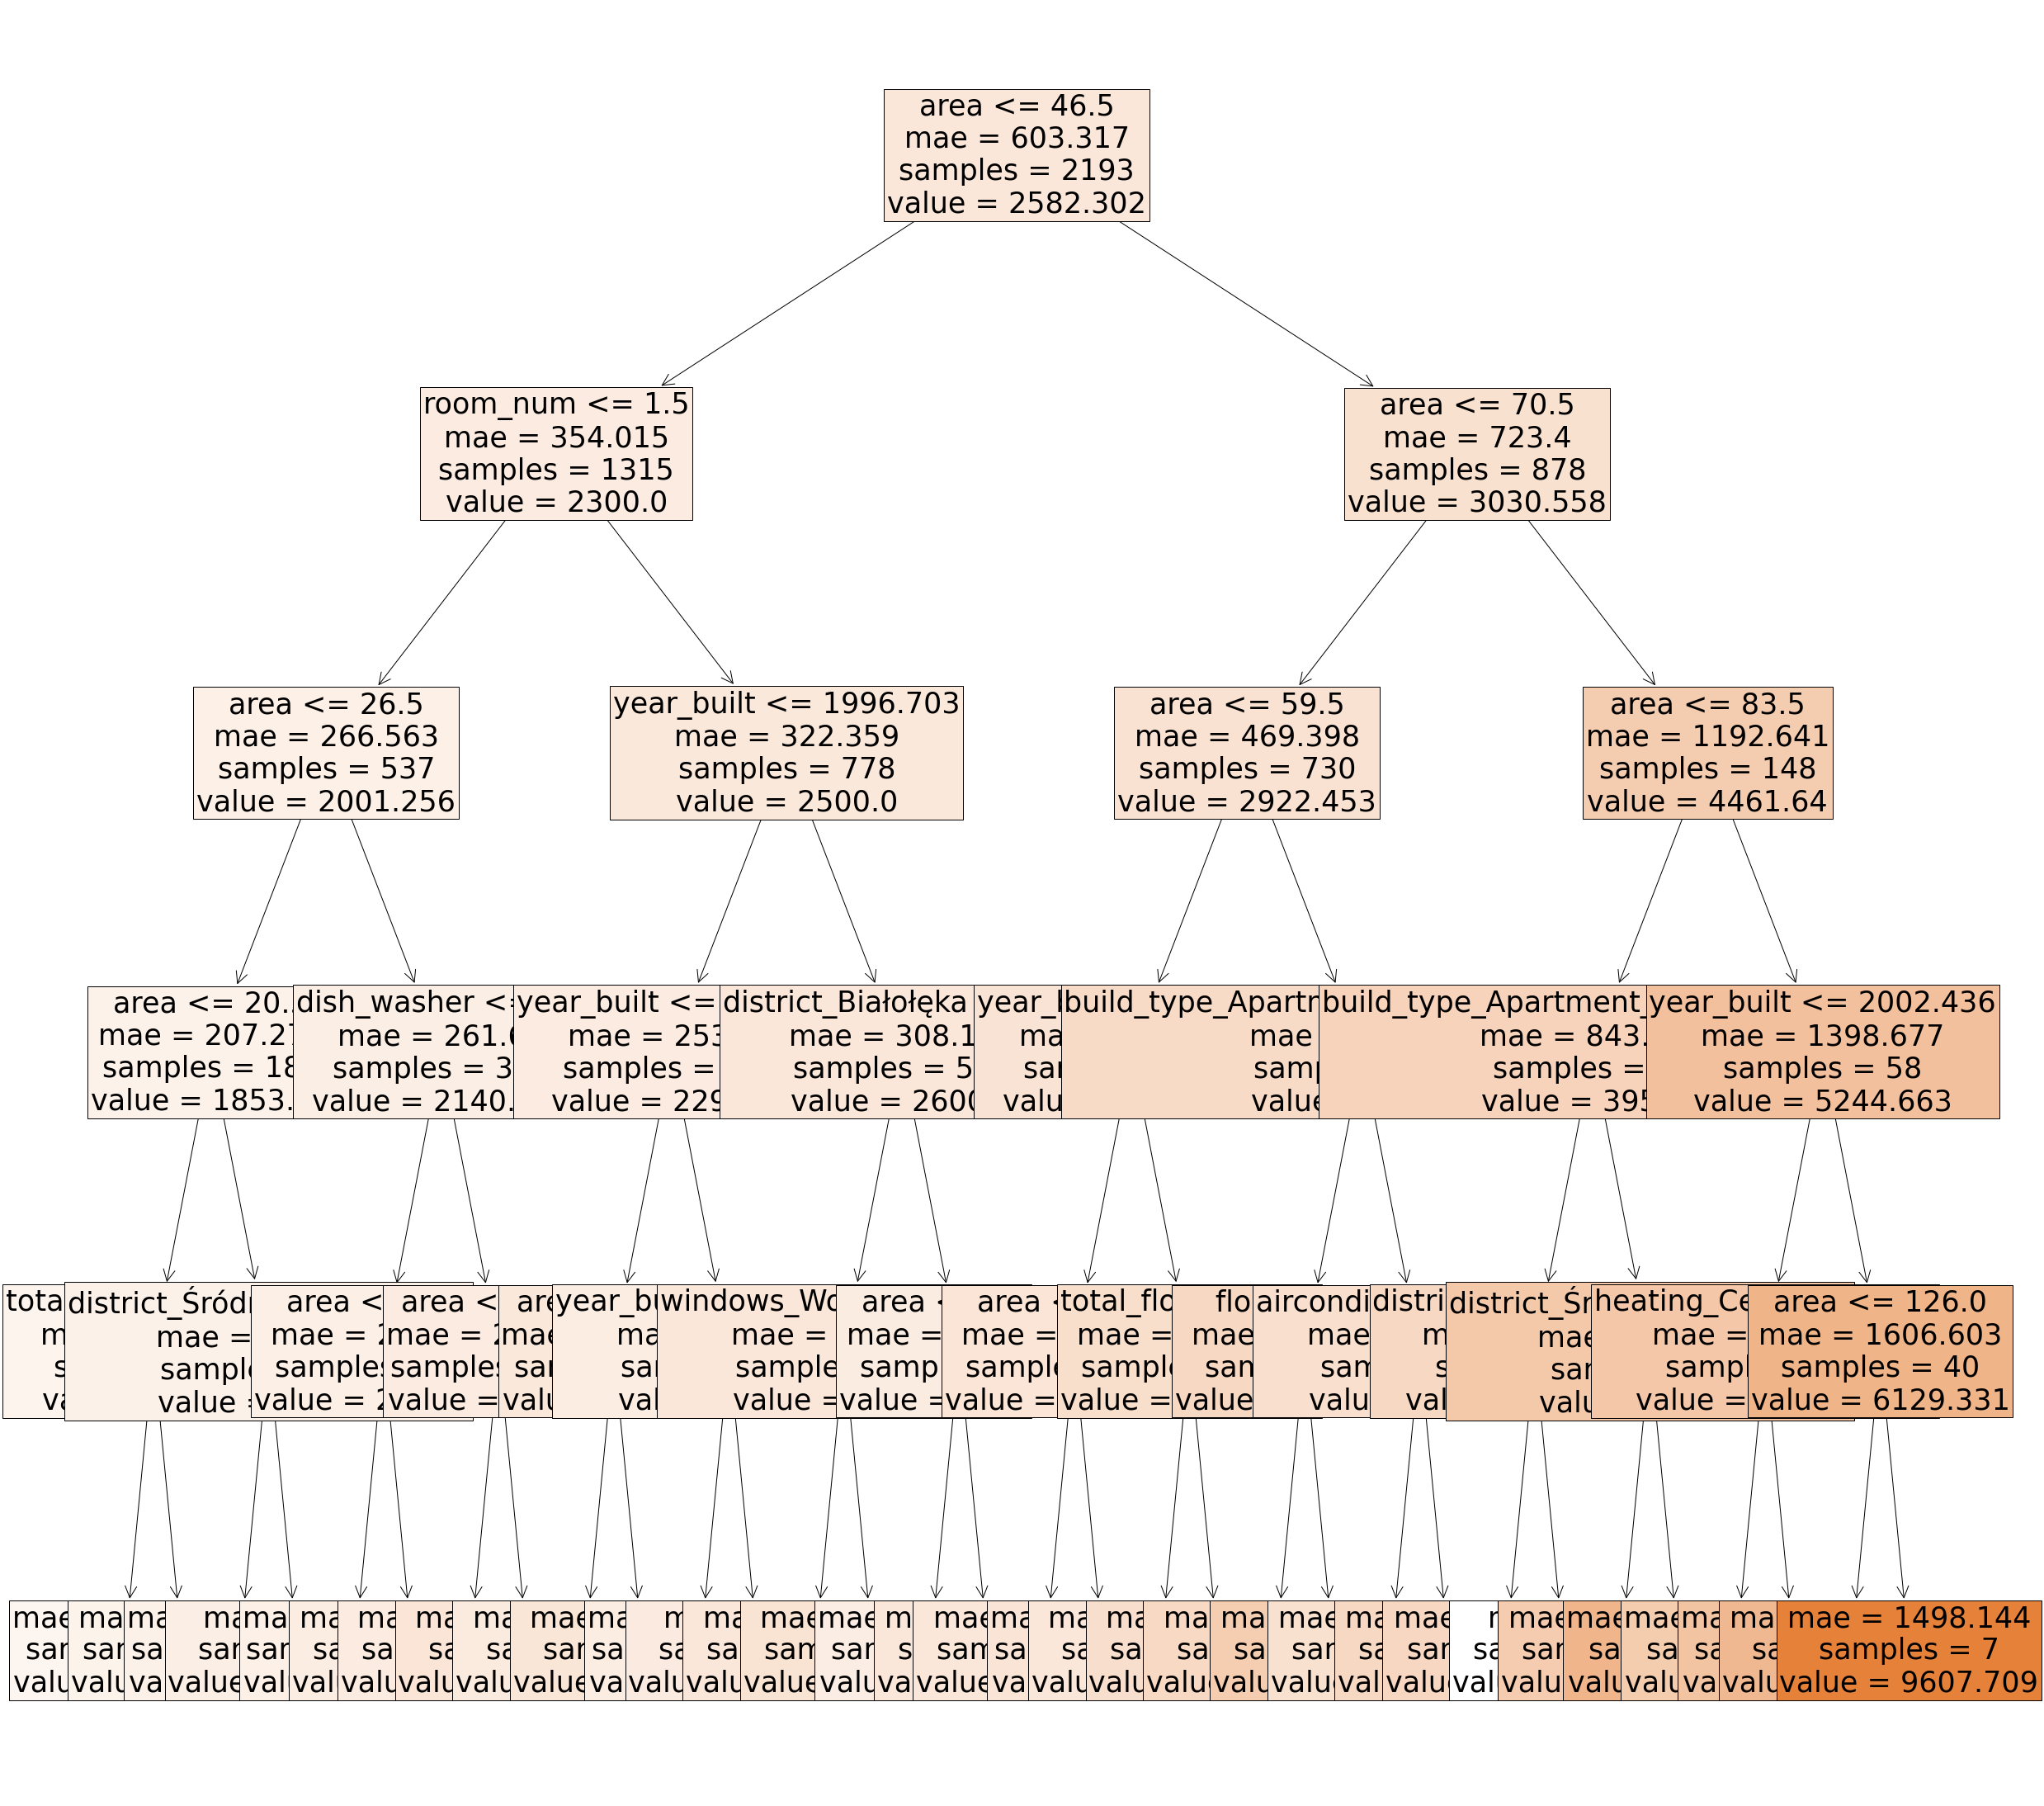

In [87]:
fig = plt.figure(figsize=(40,40))
_ = tree.plot_tree(small_tree_model.estimators_[0], feature_names=features, filled=True,  fontsize=35)

## SVR - support vectors

In [48]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

kernel = ['linear', 'poly']
degree = [2,8]
gamma = ['scale', 'auto', 0.5]
coef0 = [0.0]
tol = [0.005]
C = [1.0]
epsilon = [0.1, 0.5]

grid_array = [kernel, degree, gamma, coef0, tol, C, epsilon]
svr_models = grid_search(grid_array, model_function=SVR, results_filename='SVRModels', with_scaling=True)
print_best_params(svr_models)

Iteration 0 of 4 for SVRModels with 78 features: R2: 0.630710840840589
Iteration 1 of 4 for SVRModels with 78 features: R2: 0.630710840840589
Iteration 2 of 4 for SVRModels with 78 features: R2: -0.023667731349923993
Iteration 3 of 4 for SVRModels with 78 features: R2: -1.669925883668887

+=====================+
Best model results:
{'explained_variance_mean': 0.6386836042734697,
 'explained_variance_std': 0.028202632230013132,
 'max_error_mean': -5174.780512219854,
 'max_error_std': 979.5211404078766,
 'neg_mean_absolute_error_mean': -345.0651558855006,
 'neg_mean_absolute_error_std': 15.22641194541532,
 'params': {'C': 1.0,
            'cache_size': 200,
            'coef0': 0.0,
            'degree': 2,
            'epsilon': 0.1,
            'gamma': 'auto',
            'kernel': 'linear',
            'max_iter': -1,
            'shrinking': True,
            'tol': 0.001,
            'verbose': False},
 'r2_mean': 0.630710840840589,
 'r2_std': 0.028200899586366342}
+===============

## Najlepszy wynik z r2 = 0.6793 udało się uzyskać z parametrami: 

```JSON
{'explained_variance_mean': 0.6830784834246902,
 'explained_variance_std': 0.033303400555913236,
 'max_error_mean': -4665.630407677884,
 'max_error_std': 971.3623109045861,
 'neg_mean_absolute_error_mean': -336.76428151297534,
 'neg_mean_absolute_error_std': 11.680614584380299,
 'params': {'C': 200.0,
            'cache_size': 200,
            'coef0': 0.0,
            'degree': 2,
            'epsilon': 0.9,
            'gamma': 0.5,
            'kernel': 'linear',
            'max_iter': -1,
            'shrinking': True,
            'tol': 0.005,
            'verbose': False},
 'r2_mean': 0.6792710306762504,
 'r2_std': 0.033045603466071286}
```

## Sieci neuronowe sklearn

In [49]:
from sklearn.neural_network import MLPRegressor
hidden_layer_sizes = [(100, 1000, 100), (500, 2000, 100)]
activation = ['relu']
solver = ['adam']
alpha = [0.0001]
batch_size = ['auto']
learning_rate = ['constant']

MLPRegressor_models_full = grid_search([hidden_layer_sizes,
                                  activation,
                                  solver,
                                  alpha,
                                  batch_size,
                                  learning_rate
                                 ], model_function=MLPRegressor, results_filename='MLPRegressor')
print_best_params(MLPRegressor_models_full)


Iteration 0 of 2 for MLPRegressor with 78 features: R2: 0.6575448779641558
Iteration 1 of 2 for MLPRegressor with 78 features: R2: 0.6690102669123585

+=====================+
Best model results:
{'explained_variance_mean': 0.679611787179977,
 'explained_variance_std': 0.056139517372675946,
 'max_error_mean': -4651.357114856597,
 'max_error_std': 1146.814929286334,
 'neg_mean_absolute_error_mean': -354.61362328657157,
 'neg_mean_absolute_error_std': 18.34474525515131,
 'params': {'activation': 'relu',
            'alpha': 0.0001,
            'batch_size': 'auto',
            'beta_1': 0.9,
            'beta_2': 0.999,
            'early_stopping': False,
            'epsilon': 1e-08,
            'hidden_layer_sizes': (500, 2000, 100),
            'learning_rate': 'constant',
            'learning_rate_init': 0.001,
            'max_fun': 15000,
            'max_iter': 200,
            'momentum': 0.9,
            'n_iter_no_change': 10,
            'nesterovs_momentum': True,
          

## Sieci neuronowe - keras

In [4]:
#Sieci neuronowe
from __future__ import print_function

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import keras
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import tensorflow as tf
# from keras.backend.tensorflow_backend import set_session
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing.text import Tokenizer
from keras.layers.advanced_activations import PReLU

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

import time
%matplotlib inline

import gc

In [24]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5245993297651630833
]


In [9]:
# Standartyzacja danych dla sieci neuronowej

# One hot encoding
df_k = df.copy()
dummLev = pd.get_dummies(df_k[catFeatures], drop_first=True)
# Połączenie zmiennych numerycznych, kategorycznych w postaci on hot encoding oraz targetu
df_k = pd.concat([df_k[numFeatures], dummLev, df_k[[target]]], axis=1)

df_k[numFeatures] = df_k[numFeatures].apply(lambda x: (x-x.mean())/x.std())

features = df_k.columns.tolist()
features.remove(target)
print(features)
df_k.shape

['area', 'room_num', 'floor', 'total_floor', 'year_built', 'poddasze', 'dish_washer', 'fridge', 'furniture', 'oven', 'stove', 'tv_set', 'washer', 'balcony', 'basement', 'alarmsystem', 'anti_burglaryblinds', 'elevator', 'separatekitchen', 'internet', 'cableTV', 'telephone', 'airconditioning', 'availableforstudents', 'utilityroom', 'terrace', 'two_level', 'garden', 'build_type_Apartment_high_q', 'build_type_Apartment_medium_q', 'build_type_Infill', 'loft', 'szeregowiec', 'wolnostojacy', 'build_type_Tenement', 'build_mat_Autoclaved_aerated_concrete', 'build_mat_Brick', 'build_mat_Concreate', 'build_mat_Concrete_masonry_unit', 'build_mat_Conreate_slab', 'build_mat_Expanded_clay', 'build_mat_Other', 'build_mat_Reinforced_concrete', 'build_mat_Silicatebrick', 'build_mat_Wood', 'windows_Aluminum', 'windows_Plastic', 'windows_Wooden', 'heating_Boiler', 'heating_Central', 'heating_Electric', 'heating_Gas', 'heating_Other', 'status_Not_ready_yet', 'status_Ready', 'status_Renovation', 'district_B

(3472, 79)

In [29]:
# implementacja grid search - przekazujemy model, zakres parametrów do wytestowania oraz specyfikacje kfolda. 
# Funkcja przelatuje po wszystkich możliwych kombinacjach, zapisując wyniki do wskazanego pliku
def grid_search_dict(dict_of_arrays, 
                model_function, 
                kfold_repeats=3, 
                kfold_splits=5, 
                results_filename='randomForestModels',
               features_train=features,
               feature_predicted=target,
               dataset=df):
    models_configs = []
    all_params_sets = [ps for ps in build_params_dict(dict_of_arrays)]
    iteration = 0
    for params_list in all_params_sets:
        model = model_function(**params_list)
        models_config = {'params':model.get_params()}
        # evaluate the model
        scores_to_apply = ['neg_mean_absolute_error', 'max_error', 'r2', 'explained_variance']
        cv = RepeatedKFold(n_splits=kfold_splits, n_repeats=kfold_repeats, random_state=1)
        scores = cross_validate(model, 
                                dataset[features_train].values, 
                                dataset[feature_predicted].values, 
                                scoring=scores_to_apply, 
                                cv=cv, n_jobs=-1, error_score='raise')
        
        for s in scores_to_apply:
            models_config[f'{s}_mean'] = mean(scores[f'test_{s}'])
            models_config[f'{s}_std'] = std(scores[f'test_{s}'])

        print(f'Iteration {iteration} of {len(all_params_sets)} for {results_filename} with {len(features_train)} features: R2: {mean(scores["test_r2"])}')
        iteration += 1
        models_configs.append(models_config)
    #save model results to json
    with open(f"{results_folder}{results_filename}.json", 'w') as outfile:
        try:
            json.dump(models_configs, outfile)
        except:
            pass
        return models_configs

In [34]:
def baseline_model():
    model = Sequential()
    model.add(Dense(len(features), input_dim=len(features), kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def deep_model():
    model = Sequential()
    model.add(Dense(len(features), input_dim=len(features), kernel_initializer='normal', activation='relu'))
    model.add(Dense(1000, kernel_initializer='normal'))
    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='normal'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def deeper_model():
    model = Sequential()
    model.add(Dense(len(features), input_dim=len(features), kernel_initializer='normal', activation='relu'))
    model.add(Dense(1000, kernel_initializer='normal'))
    model.add(Dropout(0.2))
    model.add(Dense(1000, kernel_initializer='normal'))
    model.add(Dropout(0.4))
    model.add(Dense(1000, kernel_initializer='normal'))
    model.add(Dropout(0.4))
    model.add(Dense(100, kernel_initializer='normal'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

params = {
'build_fn': [deep_model, deeper_model],
'epochs': [50],
'batch_size':  [5],
'verbose': [1]
}
KerasRegressor_models_full = grid_search_dict(params, 
                                         model_function=KerasRegressor, 
                                         results_filename='KerasRegressor',
                                        dataset=df_k)
print_best_params(KerasRegressor_models_full)

Iteration 0 of 3 for KerasRegressor with 78 features: R2: 0.5511290420053818
Iteration 1 of 3 for KerasRegressor with 78 features: R2: 0.36641675636608534
Iteration 2 of 3 for KerasRegressor with 78 features: R2: -0.1728212648613722

+=====================+
Best model results:
{'explained_variance_mean': 0.587156847245001,
 'explained_variance_std': 0.1362389309377518,
 'max_error_mean': -6601.99031461967,
 'max_error_std': 3841.461322969702,
 'neg_mean_absolute_error_mean': -395.35903467946713,
 'neg_mean_absolute_error_std': 36.622371453485734,
 'params': {'batch_size': 5,
            'build_fn': <function deep_model at 0x173a61700>,
            'epochs': 20,
            'verbose': 1},
 'r2_mean': 0.5511290420053818,
 'r2_std': 0.13091467228121126}
+=====================+



In [96]:
params = {
'build_fn': [deep_model, deeper_model],
'epochs': [100],
'batch_size':  [3, 5],
'verbose': [1]
}
KerasRegressor_models_full = grid_search_dict(params, 
                                         model_function=KerasRegressor, 
                                         results_filename='KerasRegressor',
                                        dataset=df_k)
print_best_params(KerasRegressor_models_full)

### Najlepszy wynik, który udało się uzyskać dotychczas to R2: 0.648
Dla batch_size=3, deep_model oraz epochs=100

## Pytnia 
* sieci neuronowych? Jeśli chodzi o sieci to zwiekszenie liczby epok i nejronów powinno pomóc. 

## Wnioski

* Najlepszy wynik predykcji pokazał model RandomForest z parametrami 'n_estimators': 2000, min_sample_leaf:1, min_split: 2. Uzyskany wynik dopasowania to r2=0.734

* Różne modele wybierały różne cechy "najważniejsze". Lecz we wszystkich przypadkach można było znaleźć w top 10 takie cechy jak liczba pokoi, powierzchnia, czy_śródmieście, czy jest zmywarka, czy jest telewizor.

* Skalowanie parametrów powoduje znaczące przyspieszenie oraz ulepszenie działania metody SVR

* Mniejszy batch_size pokazywał lepsze wyniki dla sieci neuronowych w tym przypadku

* Odzielna kuchnia obniża cenę mieszkania! (tak samo jak alarm system czy poddasze)

* Klimatyzacja podwyższa cenę mieszkania nawet o 200 zł!

* Ceny apartametowcow oraz kamiennic są średnio o 140 zl wyższe. Mieszkań blokowych natomiast o 70zl niższe od sredniej.